In [ ]:
pip install transformers
pip install accelerate
pip install datasets

# Agenda

1. [Hugging Face and Transfer Learning](#Hugging_Face)
2. [Sentence classification with Transformers](#Sentence_classification_with_Transformers)
3. [[Theory] Intro to GPT](#gpt_intro)
4. [Prompt engineering for fake news detection](#prompting)

<a id='Hugging_Face'></a>
# Hugging Face and Transfer Learning

It is a big community, which provides:
- The most popular Transformer repo - https://github.com/huggingface/transformers
- Hub with pre-trained models - https://huggingface.co/models
- Hub with datasets - https://huggingface.co/datasets
- Spaces - where you can publish your model or try other peoples' published models - https://huggingface.co/spaces
- Some commercial solutions

We will use the first pair

## Transfer Learning (in a short)

Original article - https://machinelearningmastery.com/transfer-learning-for-deep-learning/

**What does it mean "Pre-trained models" ???**

Lets take a look at the concept of Transfer Learning

Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task.

It is a popular approach in deep learning where pre-trained models are used as the starting point on computer vision and natural language processing tasks given the vast compute and time resources required to develop neural network models on these problems and from the huge jumps in skill that they provide on related problems.

### Pipeline how to use Transfer Learning


1. **Select Source Model.** A pre-trained source model is chosen from available models. Many research institutions release models on large and challenging datasets that may be included in the pool of candidate models from which to choose from.
2. **Reuse Model.** The pre-trained model can then be used as the starting point for a model on the second task of interest. This may involve using all or parts of the model, depending on the modeling technique used.
3. **Tune Model.** Optionally, the model may need to be adapted or refined on the input-output pair data available for the task of interest.

### Tranfer Learning Use-Cases

- **Transfer Learning with Image Data:** For example this may be a prediction task that takes photographs or video data as input. For these types of problems, it is common to use a deep learning model pre-trained for a large and challenging image classification task such as the [ImageNet](https://image-net.org/) 1000-class photograph classification competition. This approach is effective because the images were trained on a large corpus of photographs and require the model to make predictions on a relatively large number of classes, in turn, requiring that the model efficiently learn to extract features from photographs in order to perform well on the problem.
- **Transfer Learning with Language Data:** It is common to perform transfer learning with natural language processing problems that use text as input or output. For these types of problems, a word embedding is used. It is just a mapping of words to a high-dimensional continuous vector space where different words with a similar meaning have a similar vector representation. Pre-trained models are mostly trained on Language modelling tasks, so they should keep well structed context information in their word embeddings.

### Benefits from Transfer Learning


1. **Higher start.** The initial skill (before refining the model) on the source model is higher than it otherwise would be.
2. **Higher slope.** The rate of improvement of skill during training of the source model is steeper than it otherwise would be.
3. **Higher asymptote.** The converged skill of the trained model is better than it otherwise would be.

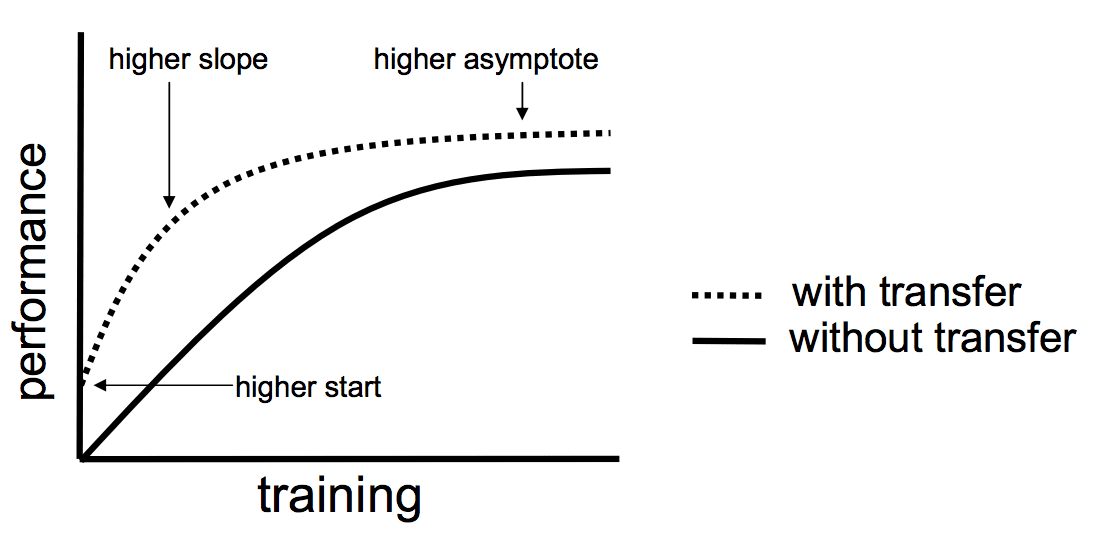

### Naive Intuition: Why does Transfer Learning work ?

Transfer learning "can be called" an inductive transfer. This is where the scope of possible models (model bias) is narrowed in a beneficial way by using a model fit on a different, but related task.

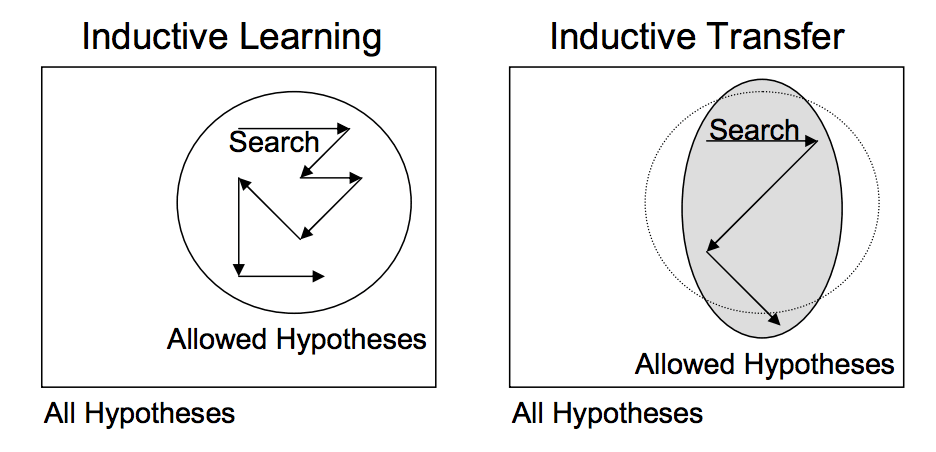

## Language Modelling

Language modeling is the task of predicting the next word or character in a document. This technique can be used to train language models that can further be applied to a wide range of natural language tasks like text generation, text classification, and question answering. 

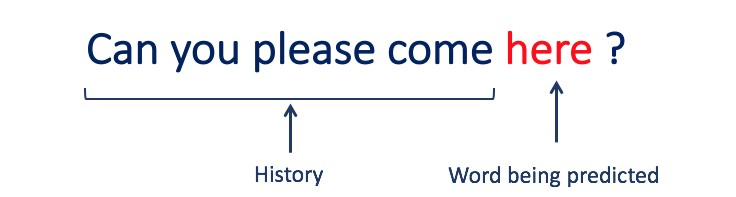

> **TODO**: Read about mathematical background of language modelling https://en.wikipedia.org/wiki/Language_model. Probability Theory works pretty cool there!

## Next Sentence Prediction

Next sentence prediction (NSP): the model concatenates two masked sentences as inputs during pretraining. Sometimes they correspond to sentences that were next to each other in the original text, sometimes not. The model then has to predict if the two sentences were following each other or not.

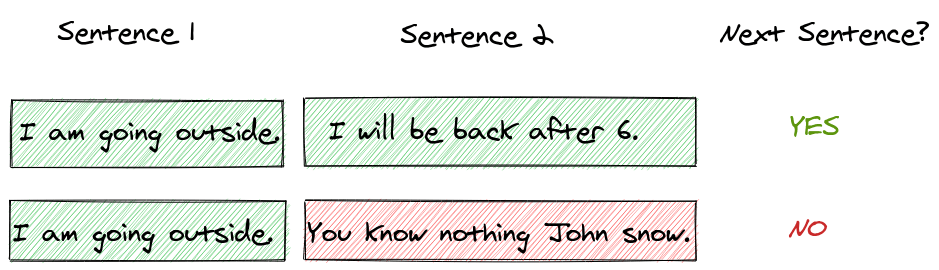

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModelForTokenClassification

# Lets construct tokenizer and model 
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
model = AutoModelForSequenceClassification.from_pretrained('bert-base-cased')
model

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

/home/ubuntu/anaconda3/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

> **TODO**: Check the [lecture](https://github.com/VSydorskyy/iasa_nlp_course/blob/main/Lecture_5/Transformers.ipynb) about transformers with equations and diagrams <br>
> **TODO**: Read more about Bert : https://huggingface.co/docs/transformers/model_doc/bert

In [2]:
from transformers import pipeline

# Now lets try this model in Language modelling task
unmasker = pipeline('fill-mask', model='bert-base-cased')
unmasker("Hello I'm a [MASK] model.")

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.09019183367490768,
  'token': 4633,
  'token_str': 'fashion',
  'sequence': "Hello I'm a fashion model."},
 {'score': 0.06349994987249374,
  'token': 1207,
  'token_str': 'new',
  'sequence': "Hello I'm a new model."},
 {'score': 0.06228185072541237,
  'token': 2581,
  'token_str': 'male',
  'sequence': "Hello I'm a male model."},
 {'score': 0.04417270049452782,
  'token': 1848,
  'token_str': 'professional',
  'sequence': "Hello I'm a professional model."},
 {'score': 0.033261459320783615,
  'token': 7688,
  'token_str': 'super',
  'sequence': "Hello I'm a super model."}]

In [56]:
import torch
from transformers import BertTokenizer, BertForNextSentencePrediction


model = BertForNextSentencePrediction.from_pretrained('bert-base-cased')
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

def nsp_processor(seq_a, seq_b, model, tokenizer):
    inputs = tokenizer(seq_a, seq_b, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probs = logits.softmax(dim=1)
        print('Sentences:', seq_a, seq_b)
        print(f"Probability of next sentence: {probs[:, 0].item()}")

In [57]:
nsp_processor(
    "Hi, nice to meet You!", 
    "My name is John!", 
    model, tokenizer
)

Sentences: Hi, nice to meet You! My name is John!
Probability of next sentence: 0.9999630451202393


In [58]:
nsp_processor(
    "Hi, nice to meet You!", 
    "SATAN 2: Russia unvelis an image of its terrifying new ‘SUPERNUKE’ – Western world takes notice", 
    model, tokenizer
)

Sentences: Hi, nice to meet You! SATAN 2: Russia unvelis an image of its terrifying new ‘SUPERNUKE’ – Western world takes notice
Probability of next sentence: 0.5173978805541992


<a id='Sentence_classification_with_Transformers'></a>
# Sentence classification with Transformers

In [59]:
import pandas as pd

df = pd.read_csv(
    "../../data/fake_news_classification/WELFake_Dataset.csv"
).drop(columns="Unnamed: 0").rename(columns={"label": "is_fake"})

cv_split = pd.read_csv('cv_split.csv')

df.text = df.text.fillna('')
df.title = df.title.fillna('')

df['subset'] = cv_split

In [60]:
df.sample(5)

,title,text,is_fake,subset
7966,How Rand Paul’s criminal justice pitch is play...,"BOWIE, Md. - The last time Sen. Rand Paul (R-K...",0,private
37393,Donald Trump’s Victory Promises to Upend the I...,JERUSALEM — Donald J. Trump’s stunning elec...,0,holdout
26929,BREAKING: CRUZ AND KASICH Announce Plan To Tak...,As the GOP paves the way for Hillary The campa...,1,fold_3
4927,The Rocky Relationship of Donald Trump and Pau...,Speaker Paul D. Ryan treads a fine line betwee...,0,holdout
63411,REINCE PRIEBUS INTERVIEW: Is Speaker Ryan to B...,,1,public


In [61]:
df.subset.value_counts()

private    15148
holdout    15148
fold_4      7069
fold_3      7069
fold_0      7069
fold_1      7069
fold_2      7069
public      6493
Name: subset, dtype: int64

In [62]:
df.text.str.split().apply(len).quantile(0.75), df.text.str.split().apply(len).quantile(0.9)

(667.0, 1102.0)

## Preparation

### How does Transformer tokenizer work ?

Documentation link - https://huggingface.co/docs/transformers/main_classes/tokenizer

Transformer tokenizer is a very high level block, so it consumes plain text and returns:
- input_ids - Text tokens, already transformed to int (long)
- token_type_ids - type of token. This info is not used for casual Classification. But it is used for Q&A tasks. So in such a task you can just concatenate Question and Answer in one string and mark 0s for Question token_type_ids and 1s for Answer token_type_ids and then just classify if there is match with binary classification. We have used such an approach [here]( https://www.kaggle.com/competitions/company-acceptance-prediction/discussion/141609)
- attention_mask - Whether take into account token or not. It is pretty useful for padding. Check out `TextDataset` below 

Also tokenizer adds special tokens. Here are some examples:
- Bert tokens:
    - `[MASK]` - The token used for masking values. This is the token used when training this model with masked language modeling. This is the token which the model will try to predict.
    - `[CLS]` - The classifier token which is used when doing sequence classification (classification of the whole sequence instead of per-token classification). It is the first token of the sequence when built with special tokens.
    - `[SEP]` - The separator token, which is used when building a sequence from multiple sequences, e.g. two sequences for sequence classification or for a text and a question for question answering. It is also used as the last token of a sequence built with special tokens.
- RoBerta tokens:
    - `<s>` - The beginning of sequence token that was used during pretraining. Can be used a sequence classifier token.
    - `<\s>` - The separator token, which is used when building a sequence from multiple sequences, e.g. two sequences for sequence classification or for a text and a question for question answering. It is also used as the last token of a sequence built with special tokens.

In [231]:
tokenized_doc = tokenizer(df["title"].iloc[0])
tokenized_doc

{'input_ids': [1, 28218, 11946, 89815, 22710, 5067, 25662, 59413, 4087, 60340, 10375, 52374, 414, 1501, 268, 589, 712, 271, 1554, 11865, 953, 10696, 17320, 268, 75990, 414, 953, 36104, 1490, 38335, 82531, 647, 86959, 592, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [232]:
print(f"Original Processed Text:\n{df['title'].iloc[0]}\n\n")
print(f"Transformed back Text after Tokenization:\n{' '.join(tokenizer.convert_ids_to_tokens(tokenized_doc['input_ids']))}")

Original Processed Text:
LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO]


Transformed back Text after Tokenization:
[CLS] ▁LAW ▁EN FORCE MENT ▁ON ▁HIGH ▁ALERT ▁Following ▁Threats ▁Against ▁Cops ▁And ▁White s ▁On ▁9 - 11 By ▁# Black Live s Matter ▁And ▁# FY F 911 ▁Terrorists ▁[ VIDEO ] [SEP]


### How does Transformer classify sentence?

Conceptually it works pretty similar to Reccurent Nets (previous lecture) in the mean that it encodes tokens and produce some sequence of encoded tokens. BUT we need to supply to the classification layer only one embedding, not a sequence. How to choose it? 

It is a good question. There are plenty of ways what exact representations to take, but there are two most popular:

1. **Classify only [CLS] token** - In such an approach, the Transformer will accumulate all primary sentence information in the [CLS] token. 

![](https://d2l.ai/_images/bert-one-seq.svg)

2. **Average all tokens** - In such an approach, we average all the extracted information. In some cases such an approach outperfoms the first one.

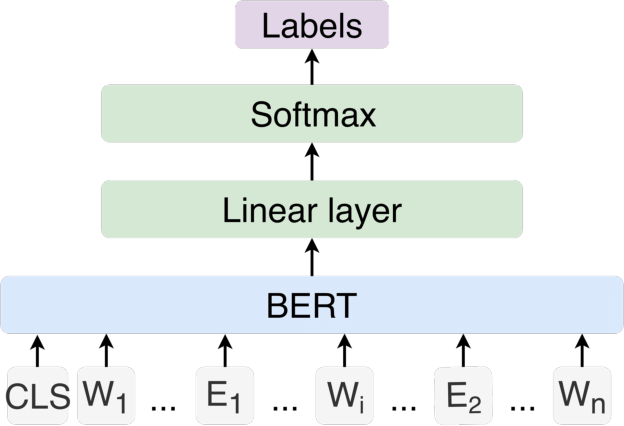

> **TODO**: Read about other approaches for extracting "sentence" vector for Text classification

In [65]:
df['full_text'] = 'Title: ' + df['title'] + '\nFull text: ' + df.text

In [84]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, DataCollatorWithPadding
from datasets import load_dataset, Dataset

tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
model = AutoModelForSequenceClassification.from_pretrained(
    'bert-base-cased',
    num_labels=2,
    ignore_mismatched_sizes=True
)


def tokenize_function(sample):
    return tokenizer(sample['full_text'], max_length=512, truncation=True)

df['full_text'] = 'Title: ' + df['title'] + '\nFull text: ' + df.text
df['labels'] = df['is_fake']

ds_train = Dataset.from_pandas(df[df.subset.str.contains('fold_*')])
ds_eval = Dataset.from_pandas(df[df.subset.str.contains('holdout')])

ds_kaggle_test = Dataset.from_pandas(df[df.subset.str.contains('public') | df.subset.str.contains('private')])


ds_train = ds_train.map(tokenize_function).remove_columns(['title', 'text', 'is_fake', 'subset', 'full_text', '__index_level_0__'])
ds_eval = ds_eval.map(tokenize_function).remove_columns(['title', 'text', 'is_fake', 'subset', 'full_text', '__index_level_0__'])
ds_kaggle_test = ds_kaggle_test.map(tokenize_function).remove_columns(['title', 'text', 'is_fake', 'subset', 'full_text', '__index_level_0__'])

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/35345 [00:00<?, ? examples/s]

Map:   0%|          | 0/15148 [00:00<?, ? examples/s]

Map:   0%|          | 0/21641 [00:00<?, ? examples/s]

In [97]:
from sklearn.metrics import f1_score

def compute_metrics(p):
    preds, labels = p
    score = f1_score(labels, preds[:, 1] >= 0.5, average='binary')
    return {'f1': score}

In [98]:
def seed_everything(seed):
    import os, random
    import numpy as np
    import torch
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.benchmark = True
    torch.backends.cudnn.deterministic = True  
seed_everything(seed=42)


#This config uses approx 8Gb of GPU memory
training_args = TrainingArguments(
    output_dir='bert-cased-ckpts',
    overwrite_output_dir=True,
    learning_rate=2e-5,
    weight_decay=0.001,
    lr_scheduler_type='linear',
    warmup_ratio=0.0,
    num_train_epochs=1, #in this particular case 1 epoch is enough, but for different cases it may require 2-3 max 5 epochs
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    gradient_accumulation_steps=1,
    fp16=True,
    optim='adamw_torch',
    eval_strategy='steps',
    save_strategy="steps",
    eval_steps=512,
    logging_steps=512,
    save_steps=512,
    save_total_limit=1,
    metric_for_best_model='f1',
    greater_is_better=True,
    load_best_model_at_end=True,
    do_train=True,
    do_eval=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=ds_train,
    eval_dataset=ds_eval,
    data_collator=DataCollatorWithPadding(tokenizer),
    compute_metrics=compute_metrics
)

In [99]:
trainer.train()

Step,Training Loss,Validation Loss,F1
512,0.030000,0.038350,0.991702
1024,0.039900,0.029364,0.994173
1536,0.030000,0.028823,0.993431
2048,0.018100,0.022305,0.994797


TrainOutput(global_step=2210, training_loss=0.0281849014273596, metrics={'train_runtime': 536.6635, 'train_samples_per_second': 65.861, 'train_steps_per_second': 4.118, 'total_flos': 9299660251699200.0, 'train_loss': 0.0281849014273596, 'epoch': 1.0})

In [100]:
eval_preds = trainer.predict(ds_eval)

In [114]:
from sklearn.metrics import roc_auc_score

roc_auc_score(ds_eval['labels'], scipy.special.softmax(eval_preds.predictions, axis=1)[:, 1])

0.9998015630425873

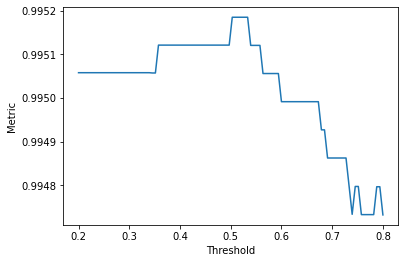

Best th: 0.5030303030303032 with f1: 0.9951852089619311


In [132]:
import numpy as np
from matplotlib import pyplot as plt

th_list = np.linspace(0.2, 0.8, num=100)
f1_scores = [f1_score(ds_eval['labels'], scipy.special.softmax(eval_preds.predictions, axis=1)[:, 1] >= th) for th in th_list]

plt.plot(th_list, f1_scores, label='F1 scores')
plt.xlabel('Threshold')
plt.ylabel('Metric')
plt.show()

best_th_ind = np.argmax(f1_scores)
best_th = th_list[best_th_ind]

print(f'Best th: {best_th} with f1: {f1_scores[best_th_ind]}')

## Best for Private/Public pseudo-kaggle predict

In [137]:
kaggle_preds = trainer.predict(ds_kaggle_test)

kaggle_preds_proba = scipy.special.softmax(kaggle_preds.predictions, axis=1)[:, 1]
kaggle_preds_labels = scipy.special.softmax(kaggle_preds.predictions, axis=1)[:, 1] >= best_th

In [140]:
df_kaggle = df[df.subset.str.contains('public') | df.subset.str.contains('private')].reset_index(drop=True)
df_kaggle['preds'] = kaggle_preds_proba

In [143]:
print("Public F1:\t", f1_score(df_kaggle.loc[df_kaggle.subset == 'public', "is_fake"], df_kaggle.loc[df_kaggle.subset == 'public', "preds"] > best_th))
print("Public Roc Auc:\t", roc_auc_score(df_kaggle.loc[df_kaggle.subset == 'public', "is_fake"], df_kaggle.loc[df_kaggle.subset == 'public', "preds"]))

print("Private F1:\t", f1_score(df_kaggle.loc[df_kaggle.subset == 'private', "is_fake"], df_kaggle.loc[df_kaggle.subset == 'private', "preds"] > best_th))
print("Private Roc Auc:\t", roc_auc_score(df_kaggle.loc[df_kaggle.subset == 'private', "is_fake"], df_kaggle.loc[df_kaggle.subset == 'private', "preds"]))

Public F1:	 0.9950620978602424
Public Roc Auc:	 0.999836198203023
Private F1:	 0.9953093876501959
Private Roc Auc:	 0.9998982866659297


## Using models with longer context window

In this particular case, in terms of metrics, there is no sense in using a better or deeper model or a longer context window. However, for the competition after the course, you may need it.

In [148]:
tokenizer = AutoTokenizer.from_pretrained('microsoft/deberta-v3-base')
model = AutoModelForSequenceClassification.from_pretrained(
    'microsoft/deberta-v3-base',
    num_labels=2,
    ignore_mismatched_sizes=True
)


def tokenize_function(sample):
    return tokenizer(sample['full_text'], max_length=2048, truncation=True) #increased max_length, because news articles are long

ds_train = Dataset.from_pandas(df[df.subset.str.contains('fold_*')])
ds_eval = Dataset.from_pandas(df[df.subset.str.contains('holdout')].sample(frac=0.2))

ds_train = ds_train.map(tokenize_function).remove_columns(['title', 'text', 'is_fake', 'subset', 'full_text', '__index_level_0__'])
ds_eval = ds_eval.map(tokenize_function).remove_columns(['title', 'text', 'is_fake', 'subset', 'full_text', '__index_level_0__'])


def seed_everything(seed):
    import os, random
    import numpy as np
    import torch
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.benchmark = True
    torch.backends.cudnn.deterministic = True  
seed_everything(seed=42)


#This config uses approx 20Gb of GPU memory
training_args = TrainingArguments(
    output_dir='debertav3-cased-ckpts',
    overwrite_output_dir=True,
    learning_rate=1e-5,
    weight_decay=0.001,
    lr_scheduler_type='linear',
    warmup_ratio=0.0,
    num_train_epochs=0.2, #0.2 for demonstration purposes, in real world should be set to bigger number
    per_device_train_batch_size=4, # reduced batch size to fit in GPU memory
    per_device_eval_batch_size=8,
    gradient_accumulation_steps=4, # increased accumulation to compensate smaller batch size
    fp16=True, # fp16 weights to fit in GPU memory
    optim='adamw_torch',
    eval_strategy='steps',
    save_strategy="steps",
    eval_steps=256,
    logging_steps=256,
    save_steps=256,
    save_total_limit=1,
    metric_for_best_model='f1',
    greater_is_better=True,
    load_best_model_at_end=True,
    do_train=True,
    do_eval=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=ds_train,
    eval_dataset=ds_eval,
    data_collator=DataCollatorWithPadding(tokenizer),
    compute_metrics=compute_metrics
)
trainer.train()

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/35345 [00:00<?, ? examples/s]

Map:   0%|          | 0/3030 [00:00<?, ? examples/s]

Step,Training Loss,Validation Loss,F1
256,0.254000,0.091430,0.975962


TrainOutput(global_step=442, training_loss=0.1796455124384677, metrics={'train_runtime': 875.2313, 'train_samples_per_second': 8.077, 'train_steps_per_second': 0.505, 'total_flos': 4250972445279936.0, 'train_loss': 0.1796455124384677, 'epoch': 0.20006789634491343})

## Comparing Transformers to Classical ML methods

**Pros**
+ Shows better performance in terms of metrics.
+ Requires less text preprocessing.

**Cons**
- Much harder to train.
- Overfits pretty fast.
- Harder to deploy.
- Often requires GPU for both training and inference.

<a id='gpt_intro'></a>
# [Theory] Intro to GPT

> **TODO:** Check the [lecture](https://github.com/VSydorskyy/iasa_nlp_course/blob/main/Lecture_6/lecture_6_lp.ipynb) about generative models 

---
**Generative pre-trained transformers (GPT)** models are **decoder-only** Transformer models. In the original ["Attention is All You Need" paper](https://arxiv.org/pdf/1706.03762.pdf) that introduced the Transformer architecture, the model was presented as an encoder-decoder architecture. However, in the case of GPT models, the encoder component is omitted, and only the decoder stack is used.


### Auto-regressive generation

Approach when model generates text or language sequentially, word by word or token by token, with each word being dependent on the preceding words in the sequence is called auto-regressive. This approach is "auto-regressive" because the model uses its own previously generated words as context to predict and generate the next word. 

Auto-regressive language generation is based on the assumption that the probability distribution of a word sequence can be decomposed into the product of conditional next word distributions:
$$\large P(w_{1:T}|W_0) = \prod_{t=1}^T P(w_t|w_{1:t-1}, W_0),\;with\;w_{1:0}=∅$$

and $W_0$ being the initial context word sequence.

The length $T$ of the word sequence is usually determined on-the-fly and corresponds to the timestep $t=T$ the `<EOS>` token is generated from $P(w_t|w_{1:t-1}, W_0)$.

![ar](../images/text-gen-diagram.png)


The GPT model is performing autoregressive text generation. In this context, they operate solely as decoders, producing text one word at a time based on the preceding context. This makes them well-suited for tasks like text completion, text generation, and natural language understanding.

### Ways of selecting tokens
#### Greedy search

Greedy search is the simplest decoding method. It selects the word with the highest probability as its next word $w_t=argmax_w P(w∣w_{1:t−1})$ at each timestep $t$.

![](../images/greedy_search.png)

The major drawback of greedy search though is that it misses high probability words hidden behind a low probability word as can be seen in our sketch above:

#### Sampling

Sampling means randomly picking the next word $w_t$ according to its conditional probability distribution:

$$\large w_t∼P(w ∣ w_{1:t−1})$$

We can further improve this by modifing the pool of words we use for it, or by weighting the probabilities of words e.g. using softmax temprature <br>

$$ \frac{\exp(z_i / T)}{\sum_j \exp(z_j / T)} $$ <br><br>
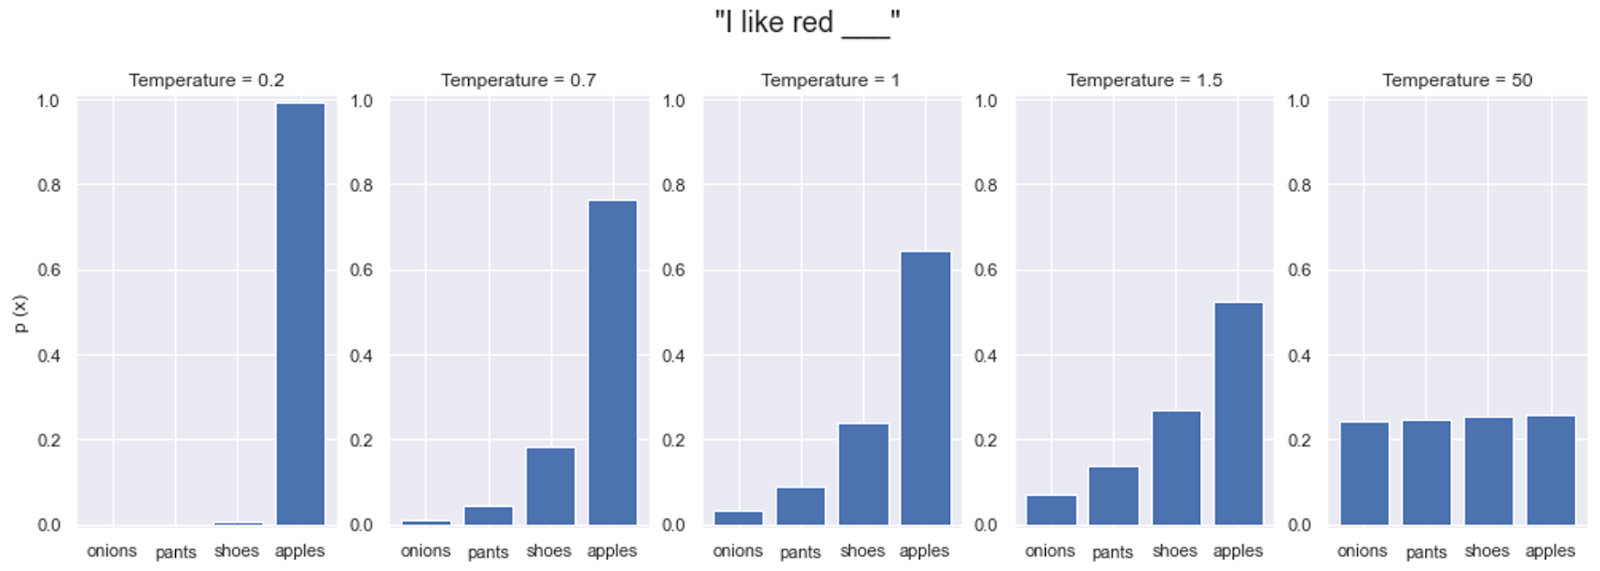

Commonly, Top-K sampling is performed:

1. The language model generates a probability distribution over the entire vocabulary for the next token in the sequence.

2. It ranks the tokens by their probabilities in descending order.

3. It identifies the top-k tokens with the highest probabilities. "k" is a predefined threshold that determines how many tokens to consider.

4. The model randomly samples from this set of top-k tokens to choose the next token in the sequence.

The top-k sampling method ensures that the next token is chosen from a restricted set of possibilities, which can be especially useful in text generation to control the output's quality and coherence. It balances between deterministic (by selecting only the top-k tokens) and more random (by allowing some variability in the selected token) generation.

#### Example with K=6:
![%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%BD%D1%8F.png](../images/sampling.png)

<a id='prompting'></a>
# Prompt engineering for fake news detection

In [ ]:
pip install -qU langchain-openai
pip install -qU langchain-groq

In [156]:
df_prompt_experiments = df[df.subset.str.contains('holdout')].sample(200).reset_index(drop=True)

In [162]:
from langchain_openai import ChatOpenAI
import getpass
import os

os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OpenAI API key: ")

llm = ChatOpenAI(
    model="gpt-4o",
    temperature=0.5,
    max_tokens=128,
    timeout=None,
    max_retries=2
)

Enter your OpenAI API key:  ···················································


In [179]:
def get_response_from_api(api_client, text, system_prompt):
    try:
        response = None
        messages = [
            ("system", system_prompt),
            ("human", text)
        ]
        ai_msg = api_client.invoke(messages).content.lower().strip()
        if 'yes' in ai_msg:
            response = 1
        if 'no' in ai_msg:
            response = 0
        return response
    except Exception as exc:
        print(exc)
        return None

In [181]:
from tqdm.autonotebook import tqdm
tqdm.pandas()

## naive prompts that uses prior model knowledge

system_prompt = """
You are an expert in the news analysis. 
You need to response in a single word: "yes" if the provided article looks like a fake news or a yellow press or "no" if the provided article comes from a solid paper
"""
df_prompt_experiments['prompt1_results'] = df_prompt_experiments.full_text.progress_apply(lambda text: get_response_from_api(llm, text, system_prompt))

  0%|          | 0/200 [00:00<?, ?it/s]

In [184]:
f1_score(df_prompt_experiments['is_fake'], df_prompt_experiments['prompt1_results'])

0.8469072164948453


## Adding some expert knowledge to the prompt


There is a paper [Fine-Grained Analysis of Propaganda in News Articles paper](https://propaganda.qcri.org/annotations/definitions.html) that discusses the detection of various propaganda techniques in news articles. We can incorporate insights from this paper into our prompt to enhance its effectiveness.

In [185]:
from tqdm.autonotebook import tqdm
tqdm.pandas()

## naive prompts that uses prior model knowledge + expert knowledge directly added to prompt

system_prompt = """
You are an expert in the news analysis. 
You need to response in a single word: "yes" if the provided article looks like a fake news or a yellow press or "no" if the provided article comes from a solid paper.
The article will most likely be a fake news ("yes") if it uses some of these manipulative techniques:
- Presenting Irrelevant Data
- Misrepresentation of Someone's Position
- Whataboutism
- Causal Oversimplification
- Obfuscation, Intentional vagueness, Confusion
- Appeal to authority
- Black-and-white Fallacy, Dictatorship
- Name calling or labeling
- Loaded Language
- Exaggeration or Minimisation
- Flag-waving
- Slogans
- Appeal to fear/prejudice
- Repetition
- Glittering Generalities

"""
df_prompt_experiments['prompt2_results'] = df_prompt_experiments.full_text.progress_apply(lambda text: get_response_from_api(llm, text, system_prompt))

  0%|          | 0/200 [00:00<?, ?it/s]

In [186]:
f1_score(df_prompt_experiments['is_fake'], df_prompt_experiments['prompt2_results'])

0.9207920792079208

## Some insights from the data

In [202]:
df_prompt_experiments_train = df[df.subset.str.contains('fold_*')].sample(500).reset_index(drop=True)
df_nonfake_titles = df_prompt_experiments_train[~df_prompt_experiments_train.is_fake.astype(bool)]
df_fake_titles = df_prompt_experiments_train[df_prompt_experiments_train.is_fake.astype(bool)]

In [210]:
llm = ChatOpenAI(
    model="gpt-4o",
    temperature=0.5,
    max_tokens=1024,
    timeout=None,
    max_retries=2
)

system_prompt = """
You are an expert in news analysis. 
We have two lists of article titles: one labeled by other experts as fake news or propaganda, and the other as valid articles from reputable sources. 
Your task is to provide insights on topics, writing styles, usage of manipulative techniques, or any other aspects that can help distinguish a credible article from fake news.
"""

nonfake_titles = 'Title:' + '\nTitle: '.join(df_nonfake_titles.title.tolist())
fake_titles = 'Title:' + '\nTitle: '.join(df_fake_titles.title.tolist())

text = f"""
Fake news titles: {fake_titles}\n\n
Articles from reputable sources: {nonfake_titles}\n\n
"""

messages = [
    ("system", system_prompt),
    ("human", text)
]
ai_msg = llm.invoke(messages).content

In [211]:
print(ai_msg)

### Insights on Distinguishing Credible Articles from Fake News

#### Topics
**Fake News:**
- Often sensational and emotionally charged.
- Focuses heavily on political scandals, conspiracies, and controversial social issues.
- Frequently targets high-profile figures with extreme claims (e.g., Hillary Clinton, Donald Trump).
- Uses topics that are likely to incite strong emotional reactions, such as violence, racism, and corruption.

**Credible News:**
- Covers a broad range of topics, including politics, economy, health, and international affairs.
- Includes detailed reporting on government actions, policy changes, and international relations.
- Often incorporates expert opinions and data to support the information.
- Focuses on factual reporting and avoids sensationalism.

#### Writing Styles
**Fake News:**
- Uses exaggerated language and hyperbolic statements (e.g., “EXPLOSIVE Information,” “GLORIOUS,” “INSANE Statement”).
- Titles often contain all-caps words or excessive punctuatio

In [215]:
from tqdm.autonotebook import tqdm
tqdm.pandas()

## naive prompts that uses prior model knowledge + extracted knowledge from the dataset

system_prompt = """
You are an expert in the news analysis. 
You need to response in a single word: "yes" if the provided article looks like a fake news or a yellow press or "no" if the provided article looks like a credible news.
There are also some additional tips on how to distinguish fake news ("yes") from real news ("no"):
#### Topics
**Fake News ("yes"):**
- Often sensational and emotionally charged.
- Focuses heavily on political scandals, conspiracies, and controversial social issues.
- Frequently targets high-profile figures with extreme claims (e.g., Hillary Clinton, Donald Trump).
- Uses topics that are likely to incite strong emotional reactions, such as violence, racism, and corruption.

**Credible News ("no"):**
- Covers a broad range of topics, including politics, economy, health, and international affairs.
- Includes detailed reporting on government actions, policy changes, and international relations.
- Often incorporates expert opinions and data to support the information.
- Focuses on factual reporting and avoids sensationalism.

#### Writing Styles
**Fake News ("yes"):**
- Uses exaggerated language and hyperbolic statements (e.g., “EXPLOSIVE Information,” “GLORIOUS,” “INSANE Statement”).
- Titles often contain all-caps words or excessive punctuation to grab attention.
- Relies on emotionally charged words and phrases to provoke strong reactions.
- May include direct attacks or derogatory language against individuals or groups.

**Credible News ("no"):**
- Maintains a neutral and objective tone.
- Titles are straightforward and descriptive, reflecting the content of the article.
- Uses precise language and avoids unnecessary embellishments.
- Provides balanced coverage, often presenting multiple viewpoints.

#### Usage of Manipulative Techniques
**Fake News ("yes"):**
- Clickbait headlines designed to attract clicks and shares, often misleading about the content.
- Frequently includes unverified claims or sources, sometimes citing anonymous or dubious sources.
- May use doctored images or videos to support false narratives.
- Often lacks detailed evidence or context to support its claims.

**Credible News ("no"):**
- Headlines accurately reflect the content and are not designed merely to attract clicks.
- Cites credible sources, including official statements, expert analyses, and verified data.
- Provides comprehensive context and background information.
- Includes disclaimers or corrections when errors are identified.
"""
df_prompt_experiments['prompt3_results'] = df_prompt_experiments.full_text.progress_apply(lambda text: get_response_from_api(llm, text, system_prompt))

  0%|          | 0/200 [00:00<?, ?it/s]

In [216]:
f1_score(df_prompt_experiments['is_fake'], df_prompt_experiments['prompt3_results'])

0.9183673469387755

## Example of using free groq service with open-source llama3 model

In [228]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq


os.environ["GROQ_API_KEY"] = getpass.getpass("Enter your groq API key: ")


llm = ChatGroq(
    temperature=0.5,
    model="llama3-70b-8192"
)

system_prompt = """
You are an expert in the news analysis. 
You need to response in a single word: "yes" if the provided article looks like a fake news or a yellow press or "no" if the provided article comes from a solid paper.
The article will most likely be a fake news ("yes") if it uses some of these manipulative techniques:
- Presenting Irrelevant Data
- Misrepresentation of Someone's Position
- Whataboutism
- Causal Oversimplification
- Obfuscation, Intentional vagueness, Confusion
- Appeal to authority
- Black-and-white Fallacy, Dictatorship
- Name calling or labeling
- Loaded Language
- Exaggeration or Minimisation
- Flag-waving
- Slogans
- Appeal to fear/prejudice
- Repetition
- Glittering Generalities
"""

df_prompt_experiments['prompt4_results'] = df_prompt_experiments.title.progress_apply(lambda text: get_response_from_api(llm, text, system_prompt))

Enter your groq API key:  ························································


  0%|          | 0/200 [00:00<?, ?it/s]

In [229]:
f1_score(df_prompt_experiments['is_fake'], df_prompt_experiments['prompt4_results'])

0.8743718592964824

# Conclusion
- You can achieve decent results using prompt engineering with open-source models.
- By incorporating expert knowledge or insights from the data into the prompts, you can further enhance these results.
- The best performance in terms of evaluation metrics for a specific task is typically achieved by fine-tuning your model on a relevant dataset. Be cautious, though, as fine-tuning on a dataset that significantly differs from real-world distributions may lead to problems with generalization.